2021 17013: Shaikh Faizan Ahmad

2021 17014: Sonam Bharti

#**Q1.**

In [ ]:
"""
Write a function that plots for a given norm p. Use this function to plot for p = 1,2,3,inf.
"""

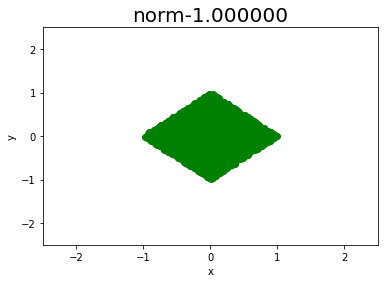

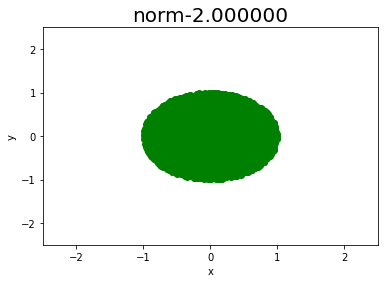

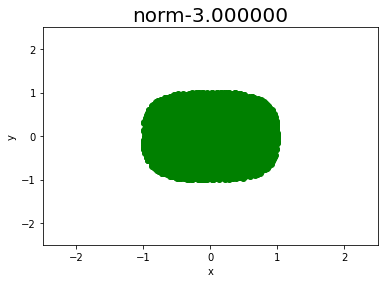

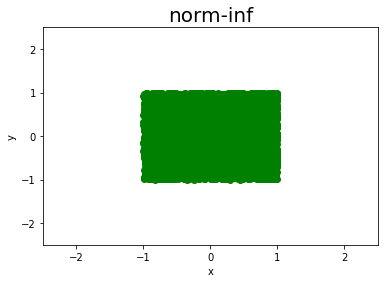

In [ ]:
#1.
#import required libraries
import numpy as np
import pylab

#define function to find norm
def plot_p_norm(p):
    for i in range(6000):
        x = np.array([np.random.rand()*2-1, np.random.rand()*2-1])

        if np.linalg.norm(x,p) < 1:
            pylab.plot(x[0], x[1], 'go')
    pylab.title(label=f"norm-%f"%p,fontsize=20)
    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.axis([-2.5, 2.5, -2.5, 2.5])
    pylab.show()



p = np.array([1,2,3,np.inf])
for i in p:
    plot_p_norm(i)

#**Q2.**

In [ ]:
"""
You will work with a widely used Iris dataset. The Iris Dataset contains four features
(sepal length, sepal width, petal length, and petal width) of 50 samples of three
species of Iris (Iris setosa, Iris virginica, and Iris versicolor). For this lab we’ll use
only two species.
Visualize the data in the Iris Dataset by considering maximum combinations of two
features in a 2D plot. Use red and green colors for labeling the two classes: Iris setosa
and Iris versicolor, respectively. Comment on whether any two classes among the
three can be separated by a line?
Plot its linear discriminant function as line using two features.
And also plot hyperplane using 3 features....
"""

In [ ]:
#2.
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder as le
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


iris_dat = pd.read_csv("Iris.csv")

new_iris = iris_dat[(iris_dat.Species == 'Iris-setosa') | (iris_dat.Species == 'Iris-versicolor')]
iris_df = new_iris.iloc[:,1:6]
iris_data = new_iris.iloc[:,1:5]



fig1 = px.scatter(iris_df, x=iris_df['SepalLengthCm'],
                  y=iris_df['SepalWidthCm'],
                  labels={"x":"Sepal Length","y":"Sepal Width"},
                  opacity=1,
                  color=iris_df['Species'],
                  color_discrete_sequence=["red", "green"])
fig1.update_layout(title_text="Sepal Length VS Sepal Width",
                  xaxis_title="Sepal Length in cm",
                  yaxis_title="Sepal Width in cm")
fig1.show()



fig2 = px.scatter(iris_df, x=iris_df['PetalLengthCm'],
                  y=iris_df['PetalWidthCm'],
                  labels={"x":"Petal Length","y":"Petal Width"},
                  opacity=1,
                  color=iris_df['Species'],
                  color_discrete_sequence=["red", "green"])
fig2.update_layout(title_text="Petal Length VS Petal Width",
                  xaxis_title="Petal Length in cm",
                  yaxis_title="Petal Width in cm")
fig2.show()



fig3 = px.scatter(iris_df, x=iris_df['SepalLengthCm'],
                  y=iris_df['PetalLengthCm'],
                  labels={"x":"Sepal Length","y":"Petal Length"},
                  opacity=1,
                  color=iris_df['Species'],
                  color_discrete_sequence=["red", "green"])
fig3.update_layout(title_text="Sepal Length VS Petal Length",
                  xaxis_title="Sepal Length in cm",
                  yaxis_title="Petal Length in cm")
fig3.show()




fig4 = px.scatter(iris_df, x=iris_df['SepalLengthCm'],
                  y=iris_df['PetalWidthCm'],
                  labels={"x":"Sepal Length","y":"Petal Width"},
                  opacity=1,
                  color=iris_df['Species'],
                  color_discrete_sequence=["red", "green"])
fig4.update_layout(title_text="Sepal Length VS Petal Width",
                  xaxis_title="Sepal Length in cm",
                  yaxis_title="Petal Width in cm")
fig4.show()



fig5 = px.scatter(iris_df, x=iris_df['SepalWidthCm'],
                  y=iris_df['PetalLengthCm'],
                  labels={"x":"Sepal Width","y":"Petal Length"},
                  opacity=1,
                  color=iris_df['Species'],
                  color_discrete_sequence=["red", "green"])
fig5.update_layout(title_text="Sepal Width VS Petal Length",
                  xaxis_title="Sepal Width  in cm",
                  yaxis_title="Petal Length in cm")
fig5.show()



fig6 = px.scatter(iris_df, x=iris_df['SepalWidthCm'],
                  y=iris_df['PetalWidthCm'],
                  labels={"x":"Sepal Width","y":"Petal Width"},
                  opacity=1,
                  color=iris_df['Species'],
                  color_discrete_sequence=["red", "green"])

fig6.update_layout(title_text="Sepal Width VS Petal Width",
                  xaxis_title="Sepal Width in cm",
                  yaxis_title="Petal Width in cm")
fig6.show()




A = iris_data.to_numpy()
X = A[:,:2]
y = iris_df.iloc[:,-1]
y = le().fit_transform(y)

lda = LinearDiscriminantAnalysis()
lda.fit_transform(X, y)


i, w0, w1 = lda.intercept_[0], lda.coef_[0][0], lda.coef_[0][1]
x0 = np.array([X[:,0].min(), X[:,0].max()])
y0 = -(i+x0*w0)/w1


fig7  = px.scatter(iris_df, x=iris_df['SepalLengthCm'], y=iris_df['SepalWidthCm'],
                   labels={"x":"Sepal Length","y":"Sepal Width"},
                   opacity=1,
                   color=iris_df['Species'],
                   color_discrete_sequence=["red", "green"])
fig7.add_traces(go.Scatter(x=x0, y=y0, name="LDA"))
fig7.update_layout(title_text="Linear Discriminant Function as Line using Two Features",
                  xaxis_title="Sepal Length in cm",
                  yaxis_title="Sepal Width in cm")
fig7.show()



X1 = A[:,:3]
lda1 = LinearDiscriminantAnalysis()
lda1.fit_transform(X1, y)


i, w0, w1, w2 = lda1.intercept_[0], lda1.coef_[0][0], lda1.coef_[0][1], lda1.coef_[0][2]
x0 = np.array([X[:,0].min(), X[:,0].max()])
x1 = np.array([X[:,1].min(), X[:,1].max()])

x0,x1= np.meshgrid(x0,x1)
y0 = -(i+x0*w0+x1*w1)/w2

fig8 = px.scatter_3d(iris_df,
                    x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm',
                    color='Species',
                    color_discrete_sequence=["red", "green"],
                    height=900, width=900)
fig8.add_traces(go.Surface(x=x0, y=x1, z=y0, name="LDA", colorscale='blues'))
fig8.update_layout(title_text="Linear Discriminant Function as Line using Three Features",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5))
fig8.show()